In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [15]:
df = pd.read_csv("sales_data_sample.csv", encoding="unicode_escape")

In [16]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [17]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [19]:
df.drop(columns = {'ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY'}, inplace= True)

In [20]:
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [23]:
X = df[['SALES', 'PRICEEACH', 'QUANTITYORDERED']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

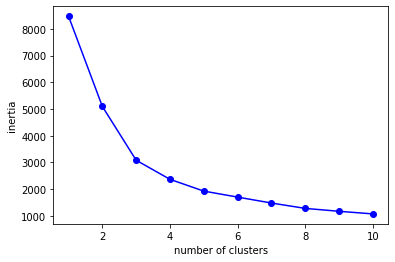

In [31]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
# inertia_ : It is a measure of how well the data points are clustered.
plt.plot(range(1,11), inertia, 'bo-')
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 10, random_state = 42)
df['CLUSTER'] = kmeans.fit_predict(X_scaled)
print(df[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'CLUSTER']])

        SALES  QUANTITYORDERED  PRICEEACH  CLUSTER
0     2871.00               30      95.70        2
1     2765.90               34      81.35        5
2     3884.34               41      94.74        1
3     3746.70               45      83.26        6
4     5205.27               49     100.00        8
...       ...              ...        ...      ...
2818  2244.40               20     100.00        2
2819  3978.51               29     100.00        1
2820  5417.57               43     100.00        8
2821  2116.16               34      62.24        5
2822  3079.44               47      65.52        6

[2823 rows x 4 columns]
